## Deep Learning Dataset 2

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import pandas as np

In [3]:
import os
import scipy.io as sio

In [4]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pace/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_

In [5]:
from keras.utils import to_categorical

In [6]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [8]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [9]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [10]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/TS2_A.csv')

In [11]:
df_data1['label'] = 0

In [12]:
df_data2 = pd.read_csv('../DataFactory/FixedPlaintext/TS2_B.csv')

In [13]:
df_data2['label'] = 1

In [14]:
len(df_data1)

400000

### Create Label

In [15]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [16]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [17]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [18]:
len(df_data)

800000

In [19]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [20]:
df_label = df_label[:,-1]

### Split Label

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [143]:
y_train = to_categorical(y_train,num_classes=2)

In [144]:
y_test = to_categorical(y_test,num_classes=2)

In [146]:
import numpy as np

In [147]:
X_train = np.array(X_train)

In [148]:
y_train = np.array(y_train)

In [151]:
X_test = np.array(X_test)

In [152]:
y_test = np.array(y_test)

In [153]:
from keras import backend as k

In [154]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [155]:
tmpModel = createMLPModel()

In [156]:
trainedModel = tmpModel.fit(x=[X_train[0:5000]],
                            y=y_train[0:5000],
                            batch_size=1000,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
5000/5000 [==============================] - 0s 47us/step - loss: 0.3323 - accuracy: 0.5118
Epoch 2/30
5000/5000 [==============================] - 0s 13us/step - loss: 0.2825 - accuracy: 0.5680
Epoch 3/30
5000/5000 [==============================] - 0s 12us/step - loss: 0.2539 - accuracy: 0.6070
Epoch 4/30
5000/5000 [==============================] - 0s 13us/step - loss: 0.2323 - accuracy: 0.6456
Epoch 5/30
5000/5000 [==============================] - 0s 14us/step - loss: 0.2152 - accuracy: 0.6842
Epoch 6/30
5000/5000 [==============================] - 0s 14us/step - loss: 0.2029 - accuracy: 0.7146
Epoch 7/30
5000/5000 [==============================] - 0s 14us/step - loss: 0.1902 - accuracy: 0.7382
Epoch 8/30
5000/5000 [==============================] - 0s 13us/step - loss: 0.1788 - accuracy: 0.7694
Epoch 9/30
5000/5000 [==============================] - 0s 14us/step - loss: 0.1690 - accuracy: 0.7902
Epoch 10/30
5000/5000 [==============================] - 0s 14us/step - l

In [157]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [158]:
iterate = K.function([tmpModel.input], [gradient])

In [159]:
grad = iterate(np.array(X_test[0:10000],dtype=np.float128))

In [160]:
grad[0][0][0]

array([-1.2345468e-09, -3.0090312e-09, -1.3781860e-09,  4.5775081e-10,
       -4.6678963e-09,  1.6838505e-09,  1.2068538e-09, -1.9427027e-09,
        1.3088396e-10,  1.3591541e-09,  1.1524116e-09,  4.4556070e-10,
        3.5708387e-09, -1.8223936e-10, -4.8586819e-09, -3.6047798e-09,
       -1.9207125e-09,  2.1959830e-09, -2.2273996e-09, -4.0175494e-09,
        2.3080039e-10, -4.3337606e-10,  4.7428292e-09,  2.5141262e-09,
       -9.9327535e-10, -1.2325617e-09, -3.0355909e-09,  4.4782480e-09,
       -5.5518958e-09, -2.4034152e-10,  2.7737026e-09, -2.1733388e-09,
       -4.5836540e-10, -3.3092573e-09,  7.1216051e-09,  5.0489439e-09,
        1.8940596e-09, -4.9251119e-09,  3.6383287e-09,  6.1159666e-10,
        1.6325316e-09, -3.9287085e-09, -2.9644658e-09, -3.9672399e-09,
       -3.0406060e-09,  5.7232974e-09, -9.7134500e-10,  9.2955876e-10,
        6.8601254e-09,  1.9321198e-09], dtype=float32)

In [161]:
grad

[[array([[-1.2345468e-09, -3.0090312e-09, -1.3781860e-09, ...,
           9.2955876e-10,  6.8601254e-09,  1.9321198e-09],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

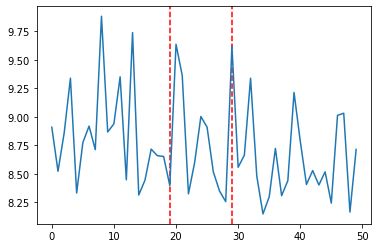

In [162]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

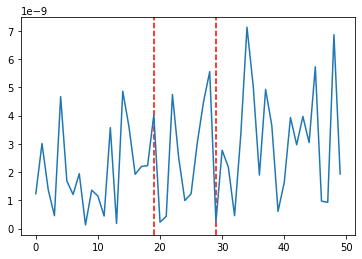

In [163]:
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=29, color='r', linestyle='--')
plt.plot(np.abs(grad[0][0][0]))
plt.show()